In [249]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

Here we read the text from the files.

In [250]:
file_lines = ''
with open('./Points.txt', 'r', encoding='UTF8') as f:
    file_lines = f.read().split('\n')

we cane see number of lines here!

In [251]:
number_of_points = int(file_lines[0])
number_of_points

524

Now we extract coordinates from text.

In [275]:
points = list()
for i in range(number_of_points):
    x, y = map(float, file_lines[i+1].split())
    points.append((x, y))

We split them to x and y coordinates.

In [276]:
X = np.array(points)[:, 0]
Y = np.array(points)[:, 1]
min_X, max_X = np.min(X), np.max(X)
min_Y, max_Y = np.min(Y), np.max(Y)
min_X, max_X, min_Y, max_Y

(-5.8894, 6.0748, -6.2076, 6.0757)

Here we can see the points on the plot.

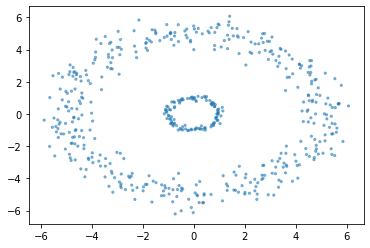

In [277]:
fig = plt.figure()
plt.scatter(X, Y,
            s=np.ones(shape=(X.shape[0],)) * 5,
            alpha=0.5)

plt.show()

We should generate two random points on the space to set them as initial positions of centroids.

In [254]:
k = 2
centroids = np.zeros(shape=(k, 2))
for i in range(k):
    centroids[i, 0] =  np.random.uniform(min_X, max_X)
    centroids[i, 1] =  np.random.uniform(min_Y, max_Y)
centroids

array([[ 2.50422805, -0.40391792],
       [ 1.66345163, -3.83263068]])

This function returns the index of minimum distance

In [255]:
def find_minimum_distance(centroids, point):
    return np.argmin(np.sum((centroids - point) ** 2, axis = -1))

Here we assign each point to its closest centroid and then we set the new coordinate of centroid to the mean of all coordinates that its assigned to.

In [256]:
def k_mean_step(centroids, points, k):
    assignemnts = dict.fromkeys(list(range(k)))
    for key in assignemnts.keys():
        assignemnts[key] = list()
    for point in points:
        closets_centroid = find_minimum_distance(centroids=centroids, point=np.array(point))
        assignemnts[closets_centroid].append(point)
    for key in assignemnts.keys():
        centroids[key] = np.mean(np.array(assignemnts[key]), axis=0)
    return centroids, assignemnts

We continue this process untill the difference between the two consequent steps is less than 1e-6. This means that we have converged an answer.

In [257]:
error = float('inf')
assignemnts = dict.fromkeys(list(range(k)))

while(error > 1e-8):
    new_centroids, assignemnts = k_mean_step(centroids=centroids.copy(), points=points, k=k)
    error = np.sum(np.abs(centroids - new_centroids))
    centroids = new_centroids

Now we plot the clusters using different colors.
If we generate it several times we can see that every time we get a different result. The overall shape looks like the same but the angle that they stay with respect to each other is different. Every time it seperates linearly but the seperating line is different each time. 

So we can see that how this algorithm depends on the inital centroid positions.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


(257,) (257,)
(267,) (267,)


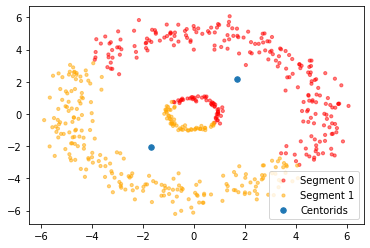

In [260]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)
cmap = get_cmap(10)
area = 10
for i in range(k):
    X = np.array(assignemnts[i])[:, 0]
    Y = np.array(assignemnts[i])[:, 1]
    print(X.shape, Y.shape)
    plt.scatter(X, Y,
                s=np.ones(shape=(X.shape[0],)) * area,
                c=cmap(i),
                alpha=0.5,
                label=f'Segment {i}')

plt.scatter(centroids[:,0], centroids[:, 1], s=30, label='Centorids')
plt.legend()

In order to make this algorithm, converge better (divide it to two central clusters) we have to add a feature to our feature vector. we can caculate the mean of all the points and then calulate distance of each point from this point and add it to the feature vector of each individual point.

In [267]:
mean_of_points = np.mean(np.array(points), axis=0)
R = np.abs(np.sum((np.array(points) - mean_of_points) ** 2, axis = -1))
new_points = [None for _ in range(len(points))]
for i in range(len(points)):
    new_points[i] = *points[i], R[i]

Here we generate two random centroids again. (This time its 3 dimentional)

In [268]:
centroids = np.zeros(shape=(k, 3))
for i in range(k):
    centroids[i, 0] =  np.random.uniform(min_X, max_X)
    centroids[i, 1] =  np.random.uniform(min_Y, max_Y)
    centroids[i, 2] =  np.random.uniform(np.min(R), np.max(R))
centroids

array([[ 2.42466433,  3.38365426,  8.32022197],
       [-5.42616068,  1.36636465,  8.35198051]])

Now we repeat the same process again.

In [269]:
error = float('inf')
assignemnts = dict.fromkeys(list(range(k)))

while(error > 1e-8):
    new_centroids, assignemnts = k_mean_step(centroids=centroids.copy(), points=new_points, k=k)
    error = np.sum(np.abs(centroids - new_centroids))
    centroids = new_centroids

If we take a look at the plot now, we can see that it's clustered as we wanted. It almost looks like 2 different circles with different radius and same centers.

Another interpertation of adding R to feature vector is that we add radius of the circles to that.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


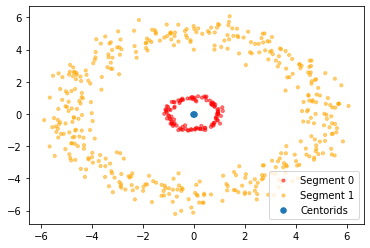

In [272]:
def get_cmap(n, name='hsv'):
    return plt.cm.get_cmap(name, n)
cmap = get_cmap(10)
area = 10
for i in range(k):
    X = np.array(assignemnts[i])[:, 0]
    Y = np.array(assignemnts[i])[:, 1]
    plt.scatter(X, Y,
                s=np.ones(shape=(X.shape[0],)) * area,
                c=cmap(i),
                alpha=0.5,
                label=f'Segment {i}')

plt.scatter(centroids[:,0], centroids[:, 1], s=30, label='Centorids')
plt.legend()